# Банки — Анализ оттока клиентов

**Ссылка на презентацию: https://disk.yandex.ru/i/udFyDPT0hW0W9A**

**Ссылка на дашборд: https://public.tableau.com/app/profile/sergei.i1673/viz/YP_2023_final_mark_1/Dashboard1?publish=yes**


**Задача:**

Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

- Проведите исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных*
    

(задачи выше сформулированы предварительно, окончательная постановка задачи произойдёт на вводной встрече)

**Описание датасетов**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности 
/ `equity`  — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` / `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

**Декомпозиция проекта:**

1. Загрузка библиотек и данных

2. Предобработка данных

- Обработка пропущенных значений
- Изменение типов данных
- Обработка дубликатов
- Проверка данных на наличие аномалий
- Бинарное кодирование части данных

3. Исследовательский анализ

- Изучение срезов данных
- Сегментация пользователей
- Составление портретов клиентов, которые склонны уходить из банка
- Формулировка промежуточных выводов

4. Статистический анализ

- Формулировка 1 и 2 гипотезы и их проверка

5. Итоговые выводы и рекомендации

## Загрузка требуемых библиотек и даннных

In [1]:
# Загрузка требуемых библиотек
import pandas as pd
import numpy as np

from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
    
df = pd.read_csv(path)

In [3]:
pd.set_option("display.float_format", "{:.2f}".format)

In [4]:
# Функця получения первичной информации о датафрейме
def first_look (data):
    print('---------Первые 5 строк-----------')
    display(data.head(5))
    print('---------Последние 5 строк---------')
    display(data.tail(5))
    print('---------Типы данных---------------\n')
    display(data.info())
    print('---------Статистическая сводка---------------')
    display(data.describe())
    print('---------Статистическая сводка по категорильным переменным---------------')
    display(data.describe(include =object))
    print('---------Пропуски-----------\n')
    display(data.isna().sum())
    print('\n---------Процент пропусков от всего датасета-----------')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\n---------Дубликаты-----------\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [5]:
# Выведем данные для проверки
first_look(df)

---------Первые 5 строк-----------


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


---------Последние 5 строк---------


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9995,120553,814.00,Рыбинск,М,27.00,1,78144.65,1,0,1,18943.64,0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,196898.29,0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,108905.09,0
9998,148700,777.00,Ярославль,Ж,68.00,3,865457.97,3,0,1,86874.90,0
9999,96267,828.00,Рыбинск,Ж,58.00,3,1180886.70,4,0,1,21422.37,0


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

---------Статистическая сводка---------------


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


---------Статистическая сводка по категорильным переменным---------------


,city,gender
count,10000,10000
unique,3,2
top,Ярославль,М
freq,5888,5005


---------Пропуски-----------



USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64


---------Процент пропусков от всего датасета-----------


balance         22.95
age              0.26
USERID           0.00
score            0.00
city             0.00
gender           0.00
equity           0.00
products         0.00
credit_card      0.00
last_activity    0.00
EST_SALARY       0.00
churn            0.00
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


**Промежуточные выводы**
- Данные содержат 10к строк в некоторых столбцих имеются пропуски.
- Не соответсветствия типов данных, нужно привести название столбцов к единому виду.
- Присутсвуют аномальные знаячения в balance и estimated_salary 
- Полные дубликаты отсутсвуют

## Предобработка данных

In [6]:
# Приведем название столбцов к нижмену регистру
df.columns

Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

In [7]:
# Приведем название солбцов к однородному виду
df = df.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})

In [8]:
# Проверим результат
df.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


In [9]:
df['user_id'].value_counts().sort_values()

206202    1
174125    1
120883    1
151674    1
223285    1
         ..
199312    2
155765    2
216848    2
141945    2
227795    2
Name: user_id, Length: 9927, dtype: int64

### Проверка на наличие пропусков

In [10]:
# Обработка пропусков
display(df.isna().sum())
display(df.isna().mean().sort_values(ascending=False)*100)

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

balance         22.95
age              0.26
user_id          0.00
score            0.00
city             0.00
gender           0.00
equity           0.00
products         0.00
credit_card      0.00
last_activity    0.00
est_salary       0.00
churn            0.00
dtype: float64

In [11]:
# Проверим пропущенные значения в столбце 'age'
df[df['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.00,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.00,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.00,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.00,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.00,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.00,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.00,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.00,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


***Значений достаточно мало 0.26 % от общего числа записей и так же присутсвуют пропуски в других столбцах.Решение: УДАЛИТЬ***

In [12]:
# Удалим записи с просусками в 'age'
df = df[df['age'].isna() == False]

In [13]:
# Проверим пропущенные значения в столбце 'balance'
df[df['balance'].isna()].describe()


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.00,2279.00,2279.00,2279.00,0.00,2279.00,2279.00,2279.00,2279.00,2279.00
mean,171904.89,865.36,42.09,0.05,NaN,1.16,0.82,0.55,226345.42,0.01
std,33303.22,89.55,11.94,0.23,NaN,0.40,0.39,0.50,199825.59,0.08
min,114182.00,642.00,18.00,0.00,NaN,0.00,0.00,0.00,20274.03,0.00
25%,142992.50,871.00,33.00,0.00,NaN,1.00,1.00,0.00,120217.39,0.00
50%,172304.00,903.00,40.00,0.00,NaN,1.00,1.00,1.00,174347.87,0.00
75%,201257.00,922.00,49.00,0.00,NaN,1.00,1.00,1.00,240372.78,0.00
max,229145.00,990.00,86.00,3.00,NaN,3.00,1.00,1.00,1333687.36,1.00


In [14]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.00,9974.00,9974.00,9974.00,7695.00,9974.00,9974.00,9974.00,9974.00,9974.00
mean,171755.22,848.68,42.73,2.63,827245.59,1.87,0.68,0.52,147786.81,0.18
std,33695.53,65.40,12.18,1.98,1980327.41,0.79,0.47,0.50,139285.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142760.00,802.00,33.00,0.00,295698.71,1.00,0.00,0.00,75251.66,0.00
50%,172643.00,853.00,40.00,3.00,524295.33,2.00,1.00,1.00,119626.79,0.00
75%,201163.75,900.00,51.00,4.00,980051.21,2.00,1.00,1.00,174499.81,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


*Вывод: Пропущенных значений в 'balance' около 23% удаление записей с пропущенным значением баланса может оказаться критичным для дальнейшего анализа.* **Решение: заменим данные 0**

In [15]:
df['balance'] = df['balance'].fillna(0)
df.isna().sum() #проверим

user_id          0
score            0
city             0
gender           0
age              0
equity           0
balance          0
products         0
credit_card      0
last_activity    0
est_salary       0
churn            0
dtype: int64

### Преобразуем некоторые типы данных

In [16]:
df['user_id'] = df['user_id'].astype('int')
df['score'] = df['score'].astype('int')
df['age'] = df['age'].astype('int')


### Проверка на наличие дубликатов

In [17]:
#Проверим столбец user_id на наличие дубликатов, так как этоединственный параметр который является уникальным
print(len(df.user_id.unique()))
print(df.user_id.value_counts().value_counts())

9924
1    9874
2      50
Name: user_id, dtype: int64


In [18]:
df = df.drop_duplicates(['user_id']).reset_index(drop=True)

In [19]:
df['user_id'].duplicated().sum()

0

***В уникальном столбце есть дубликаты user_id 50 шт., что составляет менее 1%. Решение: УДАЛИТЬ***

In [20]:
# Проверим записи на наличие неявных дубликаов.

for a in df.columns:
    print (a, df[a].unique())

user_id [183012 146556 120722 ... 115639 148700  96267]
score [ 850  861  892  866  730  856  807  825  923  906  927  921  845  837
  815  731  829  793  876  922  772  896  871  732  898  806  766  776
  868  946  828  786  944  863  822  794  924  811  814  956  935  826
  849  901  893  792  888  831  748  820  860  914  930  948  789  737
  812  933  809  749  873  859  950  937  835  768  767  785  846  750
  816  894  891  788  758  787  821  855  779  791  838  971  797  841
  915  985  870  897  763  774  686 1000  875  819  869  854  810  761
  802  958  917  745  736  908  928  884  853  780  726  881  975  852
  965  899  890  836  818  880  795  916  775  902  918  842  771  895
  801  721  966  804  885  986  753  832  979  798  754  756  823  658
  734  954  827  929  760  688  659  817  718  705  920  652  649  862
  770  824  934  952  977  840  709  878  808  900  778  800  813  905
  925  697  942  848  717  712  973  879  987  805  872  904  939  993
  790  799  943

*Вывод: Неявных дубликатов нет*

### Проверка данных на наличие аномалий

In [21]:
# Применим метод describe для оценки разброса данных в столбцах датасета
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9924.00,9924.00,9924.00,9924.00,9924.00,9924.00,9924.00,9924.00,9924.00,9924.00
mean,171737.16,848.73,42.73,2.63,639598.23,1.87,0.68,0.52,147880.18,0.18
std,33697.42,65.40,12.18,1.98,1777857.50,0.79,0.47,0.50,139358.30,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142725.00,802.00,33.00,0.00,63678.06,1.00,0.00,0.00,75252.18,0.00
50%,172643.00,853.00,40.00,3.00,376715.58,2.00,1.00,1.00,119715.39,0.00
75%,201159.25,900.00,51.00,4.00,805157.38,2.00,1.00,1.00,174666.93,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


***Вызывают сомнение 2 столбца, а именно:***
 - products с min значением равным 0. Количество продуктов, которыми пользуется клиент говорит нам о том что может быть проблема с выгрузкой данных. Или пользователь уже ушел из банка.
 - est_salary с min значением 2546.30. Очень маленькая ЗП. Нужно смотреть.

In [22]:
# Сколько пользователей не пользуются продуктами банка 
df[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8902,147837,962,Рыбинск,Ж,79,3,0.00,0,0,0,25063.96,1


In [23]:
df = df [ df['products'] != 0]

*Вывод: 
Пользователь уже не пользуется услугами банка. Решение:* **УДАЛИТЬ**

In [24]:
#df.to_csv (r'C:\Users\Admin\Desktop\ЯП_\FINAL\bank_scrooge_mark_2.csv', index= False )

### Бинарное кодирование части данных

In [25]:
# Скопируем столбцы по которым дудем производить кодирование
df['city_q'] = df['city']
df['gender_q'] =  df['gender']
df = pd.get_dummies(df, columns = ['city_q', 'gender_q'])
df = df.rename (
    columns = ({
        'city_q_Ростов':'Ростов', 
        'city_q_Рыбинск':'Рыбинск',
        'city_q_Ярославль':'Ярославль', 
        'gender_q_Ж':'female', 
        'gender_q_М':'male'}))

In [26]:
# Выведем данные для проверки
first_look(df)

---------Первые 5 строк-----------


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


---------Последние 5 строк---------


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
9919,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,0,1,0,0,1
9920,139170,894,Ярославль,М,46,0,0.00,1,1,0,196898.29,0,0,0,1,0,1
9921,115639,903,Ярославль,М,24,0,0.00,2,1,1,108905.09,0,0,0,1,0,1
9922,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,0,0,1,1,0
9923,96267,828,Рыбинск,Ж,58,3,1180886.70,4,0,1,21422.37,0,0,1,0,1,0


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9923
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9923 non-null   int64  
 1   score          9923 non-null   int64  
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   int64  
 5   equity         9923 non-null   int64  
 6   balance        9923 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  est_salary     9923 non-null   float64
 11  churn          9923 non-null   int64  
 12  Ростов         9923 non-null   uint8  
 13  Рыбинск        9923 non-null   uint8  
 14  Ярославль      9923 non-null   uint8  
 15  female         9923 non-null   uint8  
 16  male           9923 non-null   uint8  
dtypes: float64(2), 

None

---------Статистическая сводка---------------


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
count,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00
mean,171739.57,848.72,42.73,2.63,639662.69,1.87,0.68,0.52,147892.55,0.18,0.14,0.27,0.59,0.50,0.50
std,33698.26,65.39,12.17,1.98,1777935.50,0.79,0.47,0.50,139359.86,0.39,0.35,0.44,0.49,0.50,0.50
min,94561.00,642.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00,0.00,0.00,0.00,0.00,0.00
25%,142720.00,802.00,33.00,0.00,63802.41,1.00,0.00,0.00,75255.86,0.00,0.00,0.00,0.00,0.00,0.00
50%,172651.00,853.00,40.00,3.00,376840.57,2.00,1.00,1.00,119719.33,0.00,0.00,0.00,1.00,0.00,1.00
75%,201160.50,900.00,51.00,4.00,805244.39,2.00,1.00,1.00,174673.28,0.00,0.00,1.00,1.00,1.00,1.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00,1.00,1.00,1.00,1.00,1.00


---------Статистическая сводка по категорильным переменным---------------


,city,gender
count,9923,9923
unique,3,2
top,Ярославль,М
freq,5854,4971


---------Пропуски-----------



user_id          0
score            0
city             0
gender           0
age              0
equity           0
balance          0
products         0
credit_card      0
last_activity    0
est_salary       0
churn            0
Ростов           0
Рыбинск          0
Ярославль        0
female           0
male             0
dtype: int64


---------Процент пропусков от всего датасета-----------


user_id         0.00
last_activity   0.00
female          0.00
Ярославль       0.00
Рыбинск         0.00
Ростов          0.00
churn           0.00
est_salary      0.00
credit_card     0.00
score           0.00
products        0.00
balance         0.00
equity          0.00
age             0.00
gender          0.00
city            0.00
male            0.00
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


### Разобьем пользователей на группы по возрасту.

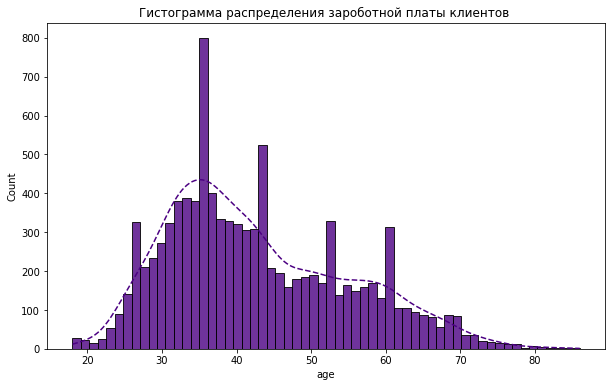

In [27]:
# построим гистограмму распределения по возрасту клиентов
plt.figure(figsize=(10, 6))
plt.title('Гистограмма распределения зароботной платы клиентов ')
sns.histplot(df['age'], 
             bins=60, 
             color = 'indigo', 
             alpha = 0.8, kde=True, 
             line_kws = {'color':'blue','linestyle': 'dashed'})
plt.show()

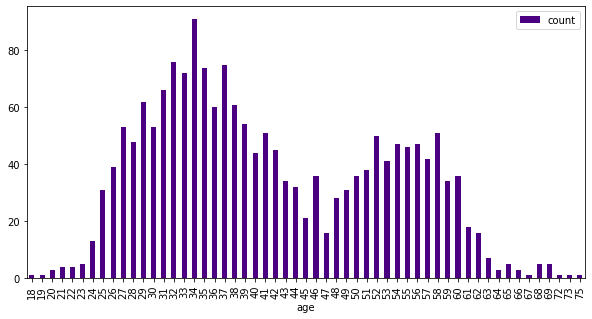

In [28]:
df.query('churn == 1')['age'].value_counts().reset_index()\
.rename(columns = {'index':'age','age':'count'}).sort_values(by='age')\
.plot(kind='bar', x='age', y='count', figsize = (10,5), color='indigo')
plt.show()

*Можем разбить всех клиентов по возрасту:*
 - от 18 до 24 лет
 - от 25 до 46 лет
 - от 47 до 62 лет 
 - от 63 и старше

In [29]:
# Создадим функцию для добавления возрастных групп в данные
def age_group (a):
    if  18<=a<=24:
        return '18-24'
    elif 25<=a<=46:
        return '25-46'
    elif 47<=a<=62:
        return '47-62'
    else:
        return  '63 и старше'

In [30]:
# Добавим столбец и применим функцию
df['age_group'] = df['age'].apply(age_group)


In [31]:
# Произдем бинарноре кодирование
df['age_group_2'] = df['age_group']
df = pd.get_dummies(df, columns = ['age_group_2'])
df= df.rename (
    columns = ({
        'age_group_2_18-24':'18-24', 
        'age_group_2_25-46':'25-46',
        'age_group_2_47-62':'47-62', 
        'age_group_2_63 и старше':'63 +'}))
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-46,47-62,63 +
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,...,0,1,0,1,0,25-46,0,1,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,0,1,0,1,0,25-46,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,...,0,1,0,1,0,25-46,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,0,0,1,1,0,47-62,0,0,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,...,0,0,1,0,1,25-46,0,1,0,0


### Проанализируем басансы пользователей

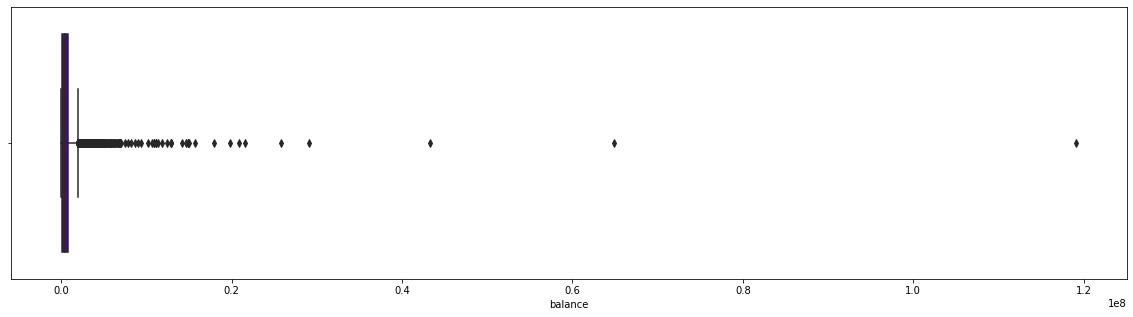

In [32]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="balance", color = 'indigo')
plt.show()

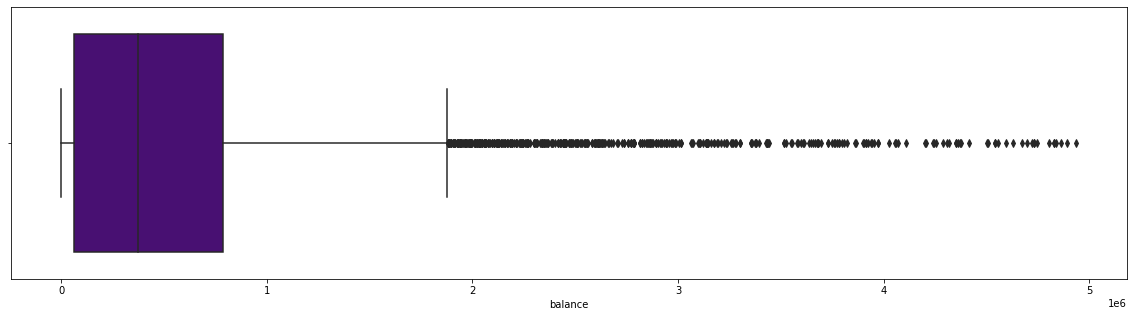

In [33]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df[df.balance<5000000], x="balance", color = 'indigo')
plt.show()

In [34]:
# Посмотрим количество пользователей с большим баллансом
print(df[df.balance<5000000]['user_id'].count())

print(df.balance.count ())

9851
9923


In [35]:
df[df.balance>5000000]['user_id'].count()

72

*Вывод:* Так как есть очень большие балансы могут негативно повлиять на дальнейший анализ. **Решение** удалить эти записи.

In [36]:
df = df[df.balance<5000000]

<AxesSubplot:ylabel='balance'>

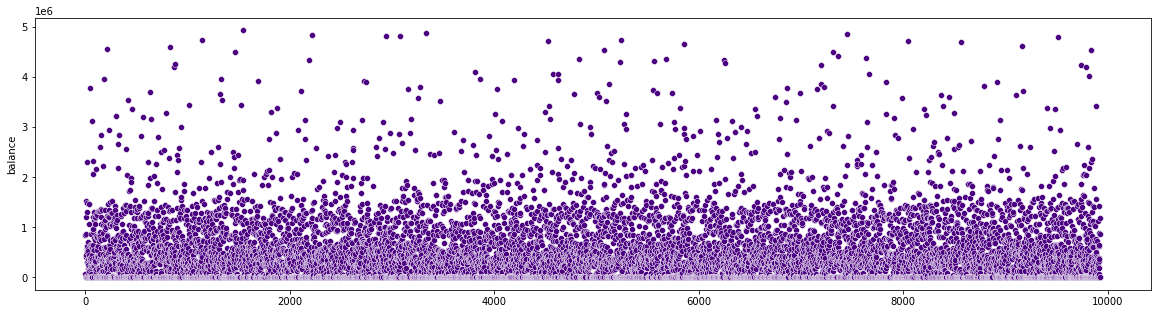

In [37]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df['balance'], x_bins = 1000000, color = 'indigo')

<AxesSubplot:>

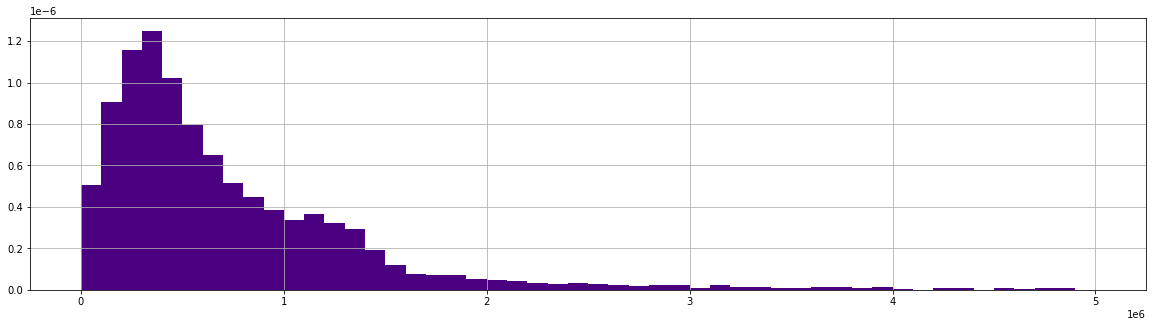

In [38]:
df['balance'].hist(bins=50,range=(1, 5_000_000),density=True,figsize = (20,5),color = 'indigo' )

### Разобьем пользователь на группы по зароботной плате

<AxesSubplot:title={'center':'Гистограмма распределения зароботной платы клиентов '}, xlabel='est_salary', ylabel='Count'>

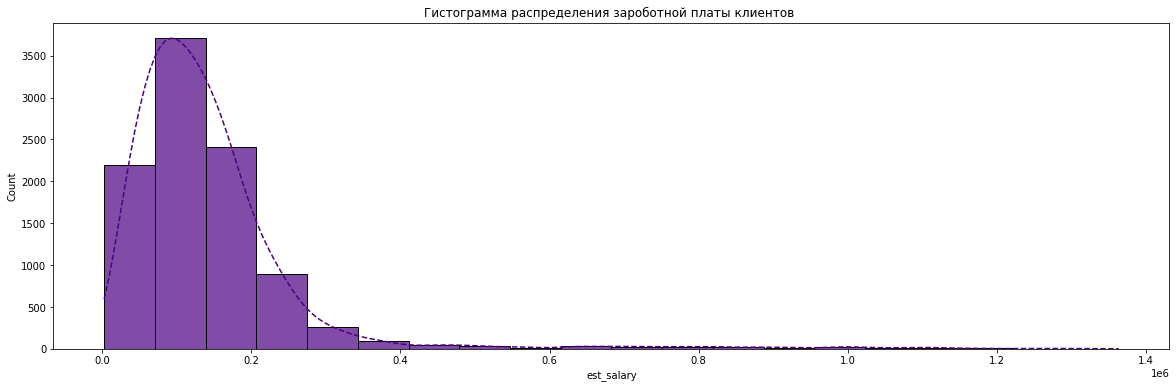

In [39]:
# построим гистограмму распределения по зароботной плате клиентов
plt.figure(figsize=(20, 6))
plt.title('Гистограмма распределения зароботной платы клиентов ')
sns.histplot(df['est_salary'], 
             bins=20, 
             color = 'indigo', 
             alpha = 0.7, kde=True, 
             line_kws = {'color':'indigo','linestyle': 'dashed'})


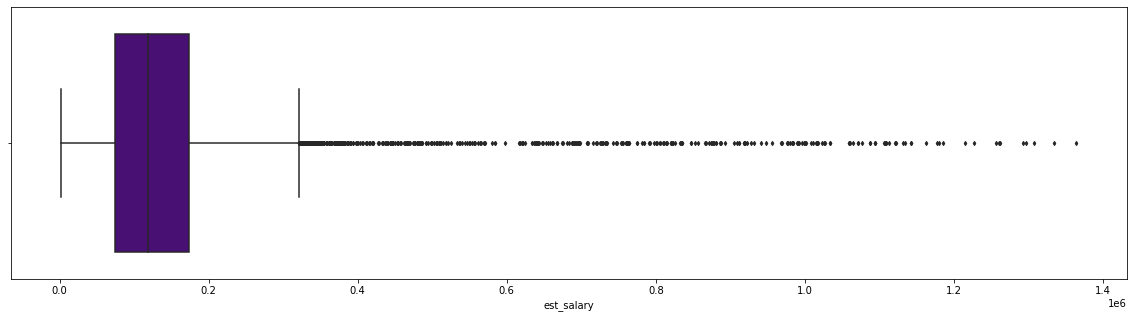

In [40]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="est_salary",
           fliersize=3,
           color = 'indigo')
plt.show()

<AxesSubplot:>

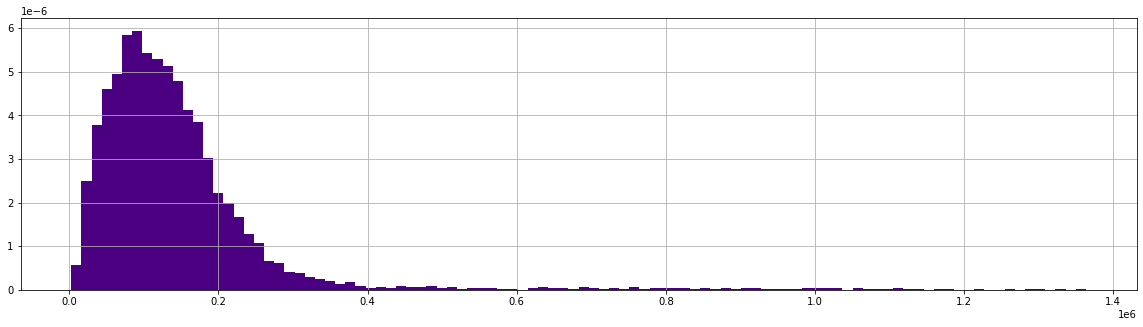

In [41]:
df['est_salary'].hist(bins=100, density=True,figsize = (20,5),color='indigo')

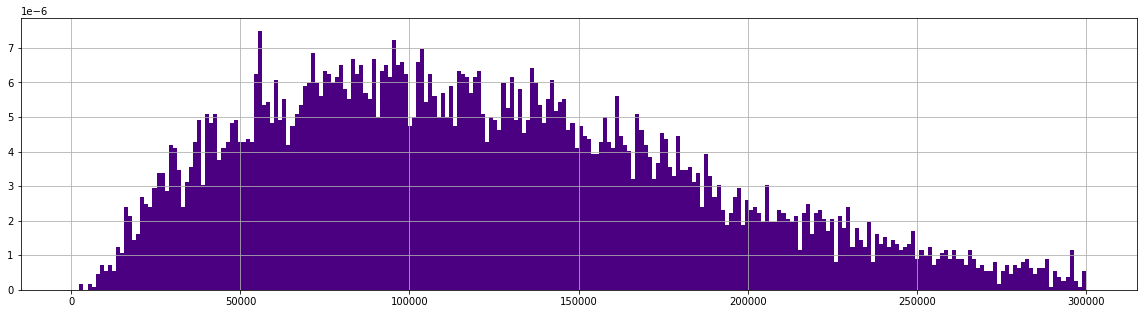

In [42]:
df['est_salary'].hist(bins=250,range=(0,300_000), density=True,figsize = (20,5) ,color='indigo')
plt.show()

*Вывод: Дипозон заработных плат от 2546,30 до 1395064,45. Разбиение по зароботной млпте можем сделть следующим образом:
- от 0 до 50 000
- от 50 001 до 100 000
- от 100 001 до 150 000
- от 150 000 до 200 000
- от 200 001
до 300 000
- 300 001+

In [43]:
# Создадим функцию для добавления групп по зароботной плате в данные
def est_salary_group (a):
    if  0<=a<=50000:
        return '0-50000'
    elif 50001<=a<=100000:
        return '50001-100000'
    elif 100001<=a<=150000:
        return '100001-150000'
    elif 100001<=a<=150000:
        return '100001-150000'
    elif 150001<=a<=200000:
        return '150001-20000'
    elif 200001<=a<=300000:
        return '20000-300000'
    else:
        return  '300000+'

In [44]:
# Добавим столбец и применим функцию
df['est_salary_group'] = df['est_salary'].apply(est_salary_group)

In [45]:
# Произдем бинарноре кодирование
df['est_salary_group_2'] = df['est_salary_group']
df = pd.get_dummies(df, columns = ['est_salary_group_2'])
df= df.rename (
    columns = ({
        'est_salary_group_2_0-50000':'0-50000', 
        'est_salary_group_2_100001-150000':'100001-150000',
        'est_salary_group_2_150001-20000':'150001-20000', 
        'est_salary_group_2_20000-300000':'20000-300000',
     'est_salary_group_2_300000+':'300000+',
     'est_salary_group_2_50001-100000':'50001-100000',}))
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,25-46,47-62,63 +,est_salary_group,0-50000,100001-150000,150001-20000,20000-300000,300000+,50001-100000
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,...,1,0,0,50001-100000,0,0,0,0,0,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,1,0,0,50001-100000,0,0,0,0,0,1
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,...,1,0,0,100001-150000,0,1,0,0,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,0,1,0,150001-20000,0,0,1,0,0,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,...,1,0,0,50001-100000,0,0,0,0,0,1


### Сгруппируем некоторые данные

In [46]:
columns_to_show= df.drop(columns=['user_id', 'churn']).columns
pd.set_option('display.max_columns', None)
df.groupby(['churn'])[columns_to_show].agg(['mean'])

,score,age,equity,balance,products,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль,female,male,18-24,25-46,47-62,63 +,0-50000,100001-150000,150001-20000,20000-300000,300000+,50001-100000
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
churn,,,,,,,,,,,,,,,,,,,,,,,
0,844.85,43.00,2.37,462562.83,1.76,0.71,0.48,145097.29,0.14,0.27,0.58,0.53,0.47,0.03,0.64,0.24,0.09,0.13,0.25,0.17,0.12,0.05,0.28
1,862.09,41.39,3.76,975189.30,2.38,0.55,0.70,141332.27,0.15,0.24,0.61,0.35,0.65,0.02,0.65,0.32,0.02,0.10,0.29,0.20,0.12,0.04,0.25


In [47]:
df.groupby(['city',]).agg('mean')

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,18-24,25-46,47-62,63 +,0-50000,100001-150000,150001-20000,20000-300000,300000+,50001-100000
city,,,,,,,,,,,,,,,,,,,,,,,,,
Ростов,169012.09,842.38,44.13,2.80,533093.48,1.86,0.57,0.53,110572.15,0.19,1.00,0.00,0.00,0.52,0.48,0.03,0.58,0.28,0.10,0.18,0.26,0.15,0.07,0.01,0.32
Рыбинск,172480.36,848.26,43.27,2.62,541288.39,1.81,0.64,0.56,133876.09,0.16,0.00,1.00,0.00,0.51,0.49,0.03,0.62,0.28,0.08,0.13,0.28,0.16,0.11,0.04,0.30
Ярославль,171958.53,849.23,42.11,2.58,567979.05,1.90,0.73,0.50,157465.09,0.19,0.00,0.00,1.00,0.49,0.51,0.02,0.67,0.24,0.07,0.10,0.25,0.19,0.14,0.06,0.25


*Вывод: Больше клиентов уходилди в готорах Ростов и Ярославль*

In [48]:
df.groupby(['age_group','churn']).agg('mean')

user_id  score   age  equity    balance  products  \
age_group   churn                                                       
18-24       0     176355.61 846.90 22.27    1.94  197923.43      1.76   
            1     169074.32 841.29 22.45    2.74  332268.61      2.00   
25-46       0     171534.43 844.33 36.15    2.34  425186.85      1.74   
            1     169177.94 867.35 34.85    3.86  958596.93      2.40   
47-62       0     172287.93 844.20 53.99    2.40  541399.51      1.78   
            1     174384.90 852.82 54.49    3.62 1056435.85      2.36   
63 и старше 0     171788.64 849.66 67.83    2.62  589719.29      1.85   
            1     170424.87 854.48 66.52    3.45  757722.45      2.29   

                   credit_card  last_activity  est_salary  Ростов  Рыбинск  \
age_group   churn                                                            
18-24       0             0.80           0.58    90891.72    0.16     0.29   
            1             0.65           0.77    94671.44    0.19     0.26   
25-46       0             0.75           0.47   156074.94    0.13     0.26   
            1             0.58           0.74   150196.87    0.14     0.23   
47-62       0             0.65           0.48   141304.04    0.16     0.30   
            1             0.50           0.63   127876.58    0.16     0.28   
63 и старше 0             0.58           0.57    93165.27    0.19     0.28   
            1             0.52           0.58   100816.57    0.29     0.16   

                   Ярославль  female  male  18-24  25-46  47-62  63 +  \
age_group   churn                                                       
18-24       0           0.54    0.41  0.59   1.00   0.00   0.00  0.00   
            1           0.55    0.19  0.81   1.00   0.00   0.00  0.00   
25-46       0           0.61    0.47  0.53   0.00   1.00   0.00  0.00   
            1           0.64    0.31  0.69   0.00   1.00   0.00  0.00   
47-62       0           0.54    0.59  0.41   0.00   0.00   1.00  0.00   
            1           0.57    0.44  0.56   0.00   0.00   1.00  0.00   
63 и старше 0           0.54    0.84  0.16   0.00   0.00   0.00  1.00   
            1           0.55    0.39  0.61   0.00   0.00   0.00  1.00   

                   0-50000  100001-150000  150001-20000  20000-300000  \
age_group   churn                                                       
18-24       0         0.30           0.19          0.09          0.04   
            1         0.29           0.16          0.06          0.13   
25-46       0         0.10           0.26          0.19          0.14   
            1         0.08           0.29          0.22          0.14   
47-62       0         0.09           0.27          0.17          0.09   
            1         0.12           0.29          0.16          0.08   
63 и старше 0         0.35           0.18          0.04          0.03   
            1         0.26           0.23          0.03          0.10   

                   300000+  50001-100000  
age_group   churn                         
18-24       0         0.00          0.37  
            1         0.00          0.35  
25-46       0         0.06          0.24  
            1         0.05          0.22  
47-62       0         0.04          0.33  
            1         0.03          0.31  
63 и старше 0         0.03          0.37  
            1         0.03          0.35

In [49]:
pd.set_option('display.max_rows', None) 
df.groupby(['age_group','city','est_salary_group','gender'])['churn'].agg('mean')

age_group    city       est_salary_group  gender
18-24        Ростов     0-50000           Ж        0.25
                                          М        0.11
                        100001-150000     Ж        0.00
                                          М        0.00
                        150001-20000      Ж        0.50
                                          М        0.00
                        50001-100000      Ж        0.00
                                          М        0.25
             Рыбинск    0-50000           Ж        0.14
                                          М        0.09
                        100001-150000     Ж        0.00
                                          М        0.33
                        150001-20000      Ж        0.00
                                          М        0.00
                        20000-300000      Ж        0.00
                                          М        1.00
                        50001-100000      Ж        0.00

---

**Данные подготовлены. Можем приступать к исследованию данных**

## Исследовательский анализ данных

In [50]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-46,47-62,63 +,est_salary_group,0-50000,100001-150000,150001-20000,20000-300000,300000+,50001-100000
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,0,1,0,1,0,25-46,0,1,0,0,100001-150000,0,1,0,0,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,47-62,0,0,1,0,150001-20000,0,0,1,0,0,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1


### Для оптимизации процесса исследования рассмотрим как все данные связаны между собой. Для этого воспользуемся функцией corr() для расчета корреляционной зависимости по всем данным.

In [51]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'Ростов', 'Рыбинск', 'Ярославль', 'female', 'male', 'age_group',
       '18-24', '25-46', '47-62', '63 +', 'est_salary_group', '0-50000',
       '100001-150000', '150001-20000', '20000-300000', '300000+',
       '50001-100000'],
      dtype='object')

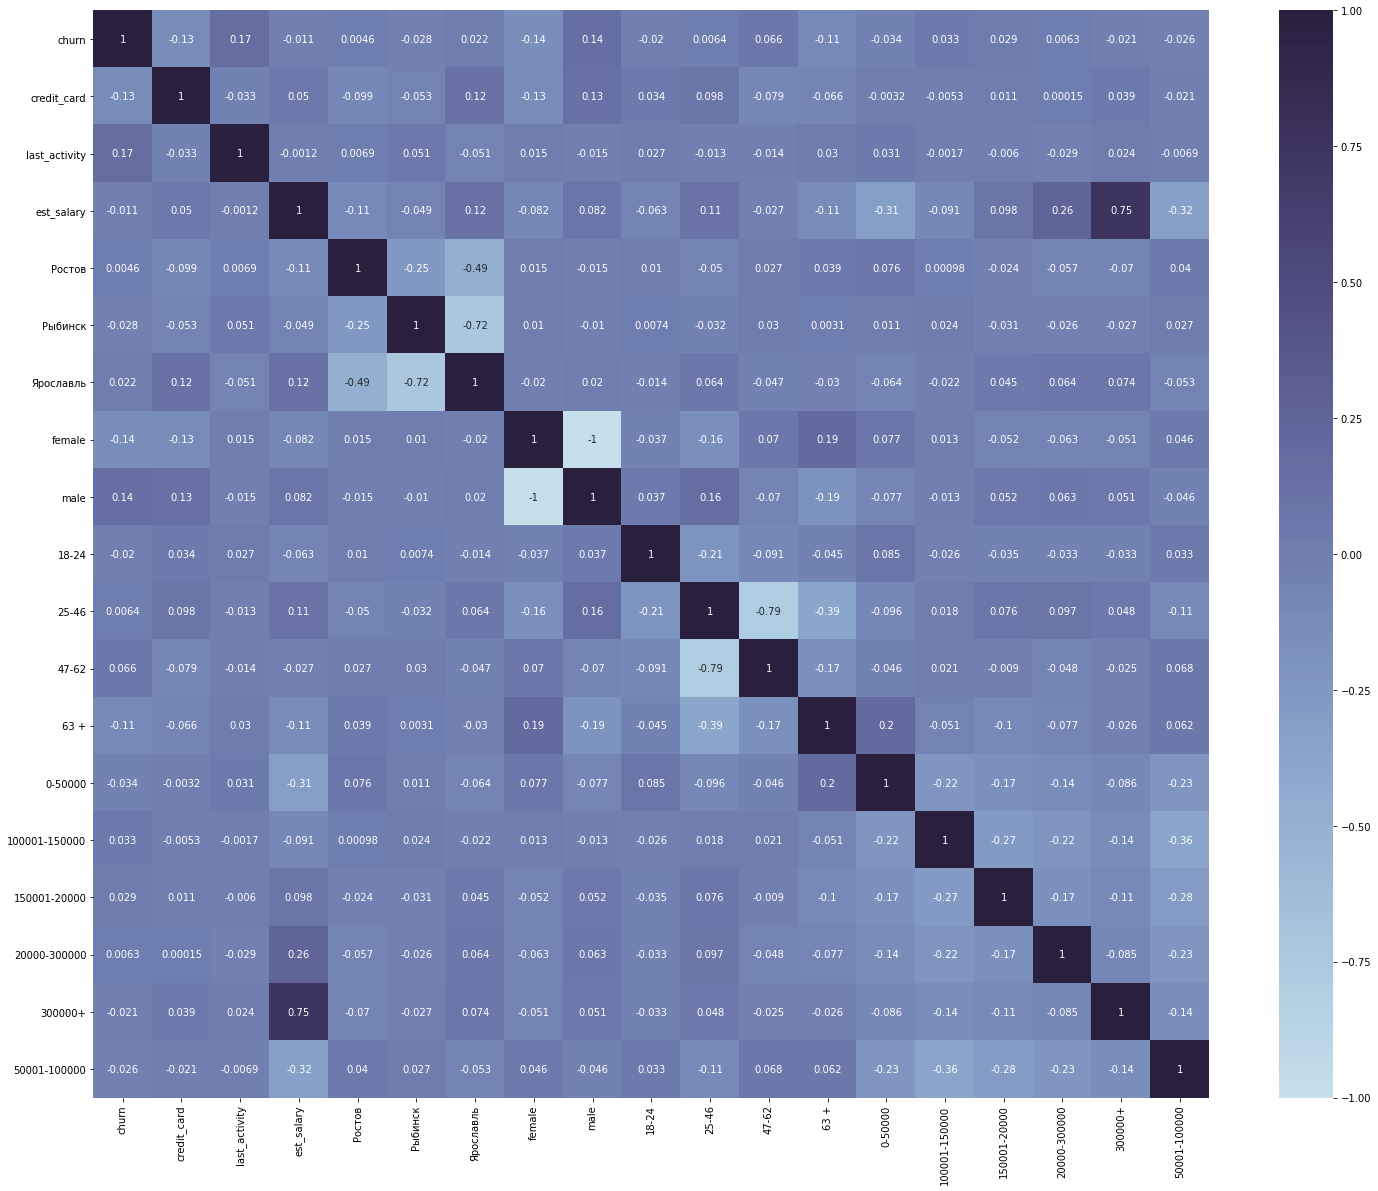

In [52]:
df_copy = df[['churn','credit_card', 'last_activity', 'est_salary', 
       'Ростов', 'Рыбинск', 'Ярославль', 'female', 'male', 'age_group',
       '18-24', '25-46', '47-62', '63 +', 'est_salary_group', '0-50000',
       '100001-150000', '150001-20000', '20000-300000', '300000+',
       '50001-100000']]
plt.figure(figsize=(25,20))
sns.heatmap (df_copy.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap=sns.color_palette("ch:s=.255,rot=-.255", as_cmap=True))
plt.show()

*Вывод: Наблюдаем наибольшую корреляцию с показателем оттока клиентов у таких параметров как:*
- количество баллов собственности
- количество продуктов которыми пользуется клиент
- активность клиента

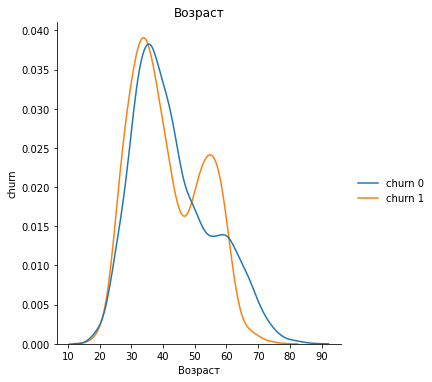

In [53]:
sns.displot(
    {
    "churn 0": df[df.churn == 0].age,
    "churn 1": df[df.churn == 1].age
    },
    kind = 'kde',
    common_norm = False # независимая нормализация каждого подмножества
)

plt.title ('Возраст')
plt.xlabel ('Возраст')
plt.ylabel ('churn')
plt.show()

In [54]:
df.groupby('churn')['age'].median()

churn
0    40
1    39
Name: age, dtype: int64

In [55]:
df.groupby('churn')['age'].mean()

churn
0   43.00
1   41.39
Name: age, dtype: float64

---------------------------------------------------

### Рассчитаем процент ушедших клиентов в разбивке по полу от общего числа

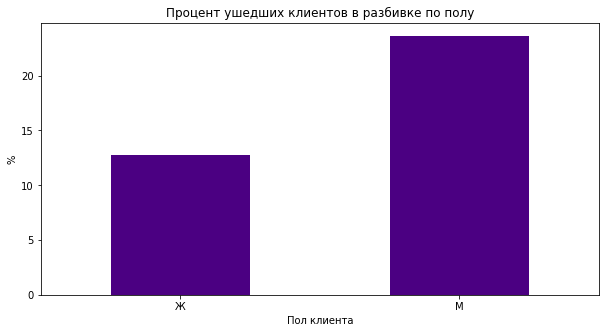

In [56]:
churn_gender = pd.pivot_table(df, values='churn', index='gender', aggfunc=['count', 'sum'])
churn_gender.columns = churn_gender.columns.droplevel(level=1)
churn_gender['percent'] = churn_gender['sum'] / churn_gender['count'] * 100
plt.figure(figsize=(15,8))
churn_gender['percent'].plot(kind='bar', 
                        title = 'Процент ушедших клиентов в разбивке по полу',
                        color='indigo', 
                        figsize = (10,5),
                        xlabel = 'Пол клиента',
                        ylabel = '%')

plt.xticks(rotation=0)
plt.show()

*Вывод: Больше всего отточных клиентов среди мужчин*

### Рассчитаем процент ушедших клиентов в разбивке по возрасту

In [57]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'Ростов', 'Рыбинск', 'Ярославль', 'female', 'male', 'age_group',
       '18-24', '25-46', '47-62', '63 +', 'est_salary_group', '0-50000',
       '100001-150000', '150001-20000', '20000-300000', '300000+',
       '50001-100000'],
      dtype='object')

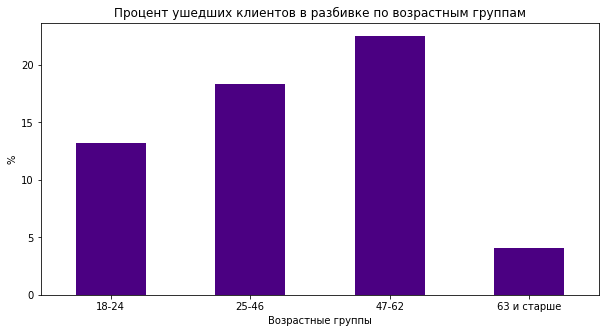

In [58]:
churn_age_group = pd.pivot_table (df, index ='age_group',values = 'churn',aggfunc = ['sum', 'count'])
churn_age_group.columns = churn_age_group.columns.droplevel(level=1)
churn_age_group['percent'] = churn_age_group['sum']/churn_age_group['count']*100
plt.figure(figsize=(15,8))
churn_age_group['percent'].plot(kind='bar', 
                        title = 'Процент ушедших клиентов в разбивке по возрастным группам',
                        color='indigo', 
                        figsize = (10,5),
                        xlabel = 'Возрастные группы',
                        ylabel = '%')
plt.xticks(rotation=0)
plt.show()

*Вывод: Наглядно видно, что в возрастной группе от 47 до 62 лет наблюдается наибольший отток клиентолв*

### Рассчитаем процент ушедших клиентов в разбивке по городам

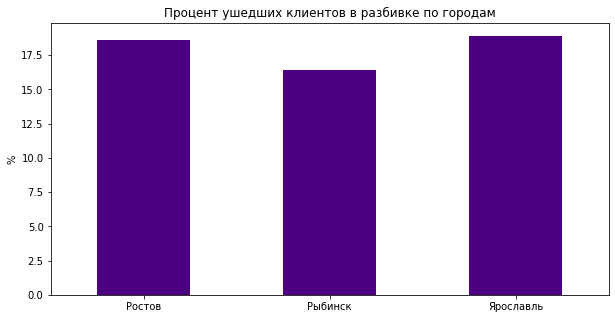

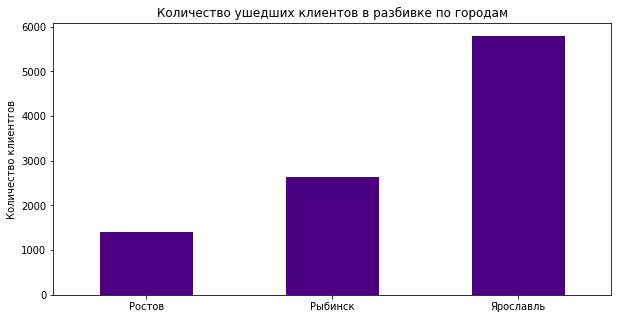

,sum,count,percent
city,,,
Ростов,263,1412,18.63
Рыбинск,434,2644,16.41
Ярославль,1095,5795,18.90


In [59]:
churn_city = pd.pivot_table (df, values = 'churn', index ='city', aggfunc = ['sum','count'])
churn_city.columns = churn_city.columns.droplevel(level=1)
churn_city['percent'] = churn_city['sum']/churn_city['count'] * 100

plt.figure(figsize=(15,8))
churn_city['percent'].plot(kind='bar', 
                        title = 'Процент ушедших клиентов в разбивке по городам',
                        color='indigo', 
                        figsize = (10,5),
                        xlabel = '',
                        ylabel = '%')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(15,8))
churn_city['count'].plot(kind='bar', 
                        title = 'Количество ушедших клиентов в разбивке по городам',
                        color='indigo', 
                        figsize = (10,5),
                        xlabel = '',
                        ylabel = 'Количество клиентгов')
plt.xticks(rotation=0)
plt.show()
churn_city

*Вывод:  В процентном соотношения показатели примерно равные. Но если посмотреть на абсолютная значения, можем заметить, что из города Ярославль наибольшее количество ушедших клиентов.*

### Рассчитаем процент ушедших клиентов в разбивке по количеству продуктов.¶

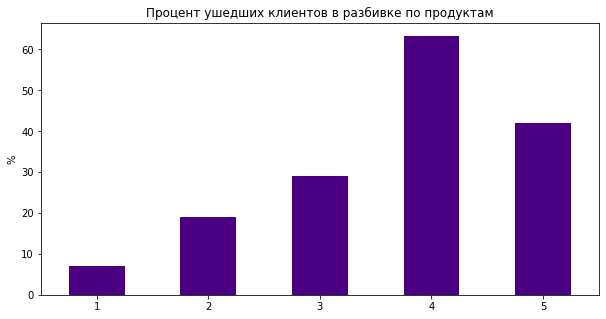

,sum,count,percent
products,,,
1,232,3295,7.04
2,963,5055,19.05
3,294,1016,28.94
4,295,466,63.30
5,8,19,42.11


In [60]:
churn_products = pd.pivot_table(df, values = 'churn', index ='products', aggfunc = ['sum', 'count'])
churn_products.columns = churn_products.columns.droplevel(level=1)
churn_products['percent'] = churn_products['sum']/churn_products['count'] * 100

plt.figure(figsize=(10,6))
churn_products['percent'].plot(kind='bar', 
                        title = 'Процент ушедших клиентов в разбивке по продуктам',
                        color='indigo', 
                        figsize = (10,5),
                        xlabel = '',
                        ylabel = '%')
plt.xticks(rotation=0)
plt.show()
churn_products

*Вывод: Максимальное число отточных клиентов имело 4 продукта. Значение чуть больше 60%*

### Рассчитаем процент ушедших клиентов в разбивке по наличию кредитной карты

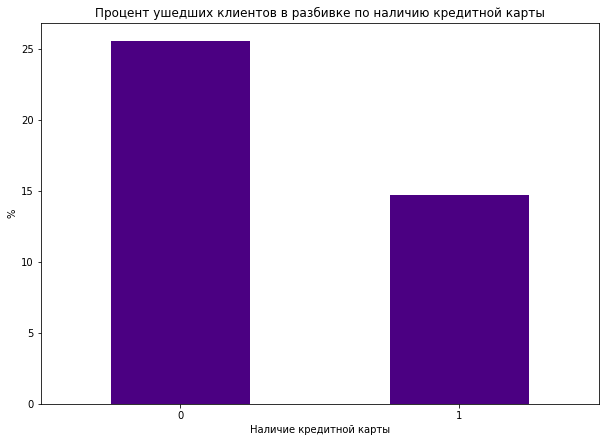

,sum,count,precent
credit_card,,,
0,802,3137,25.57
1,990,6714,14.75


In [61]:
churn_cc = pd.pivot_table(df, values = 'churn', index ='credit_card', aggfunc = ['sum', 'count'])
churn_cc.columns = churn_cc.columns.droplevel(level=1)
churn_cc['precent'] = churn_cc['sum'] /churn_cc['count'] * 100

plt.figure(figsize=(10,6))
churn_cc['precent'].plot(kind='bar', 
                        title = 'Процент ушедших клиентов в разбивке по наличию кредитной карты',
                        color='indigo', 
                        figsize = (10,7),
                        xlabel = 'Наличие кредитной карты',
                        ylabel = '%')
plt.xticks(rotation=0)
plt.show()
churn_cc

*Вывод: Клиенты у которых не было в налиции кредитной карты ушло меньше*

### Рассчитаем процент ушедших клиентов в разрезе баллов кредитного скорринга

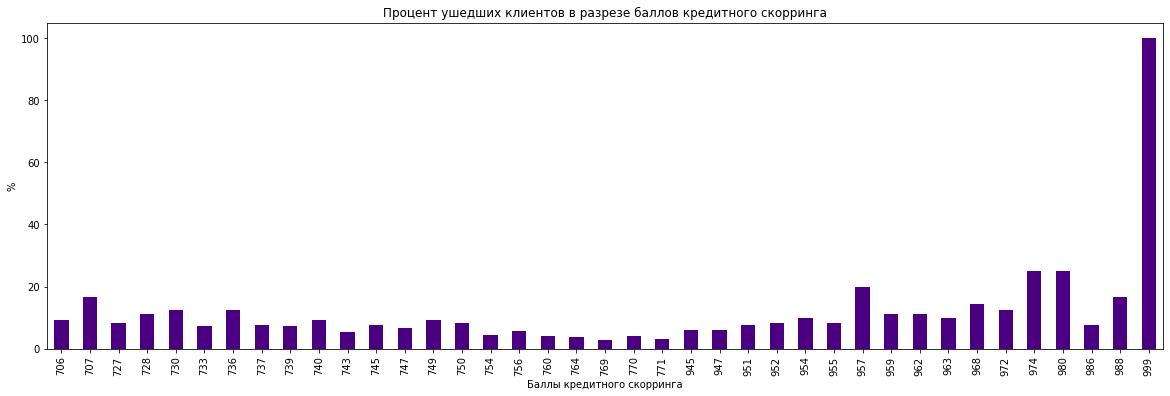

In [62]:
churn_score = pd.pivot_table(df, values = 'churn', index ='score', aggfunc = ['sum', 'count'])
churn_score.columns = churn_score.columns.droplevel(level=1)
churn_score['precent'] = churn_score['sum'] /churn_score['count'] * 100
churn_score = churn_score [churn_score['sum']==1]


churn_score['precent'].plot(kind='bar',
                        title = 'Процент ушедших клиентов в разрезе баллов кредитного скорринга',
                        color='indigo', 
                        figsize = (20,6),
                        xlabel = 'Баллы кредитного скорринга',
                        ylabel = '%')
plt.xticks(rotation=90)
plt.show()
#churn_score

*Вывод: Получается следующая картина. Видим что у отточных клиентов рейтинг **score** более 706. В диапазоне от 706 до 769 **видим снижение оттока пользователей**, а вот начиная с 945 до 999 **видно наоборот увеличение числа клиентов,** которые уходят из банка.*

## Портрет пользователя

*Портреты пользователей, которые склонны уходить из банка*

### Портрет № 1

- Возраст: 47-62
- Пол: мужской
- Доход: 0-50к
- Город: не важно
- Оценка собственности: 5
- Скоринговый рейтинг: более 800
- Количество используемых продуктов: 4
- Наличие кредитной карты: нет
- Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [63]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-46,47-62,63 +,est_salary_group,0-50000,100001-150000,150001-20000,20000-300000,300000+,50001-100000
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,0,1,0,1,0,25-46,0,1,0,0,100001-150000,0,1,0,0,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,47-62,0,0,1,0,150001-20000,0,0,1,0,0,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1


In [64]:
portrait_1 = df.query('age_group=="47-62" and gender=="М" and equity==5 and last_activity==1\
and credit_card==1 and churn==1 and products==4').reset_index()

portrait_1 

,index,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-46,47-62,63 +,est_salary_group,0-50000,100001-150000,150001-20000,20000-300000,300000+,50001-100000
0,457,228963,887,Ярославль,М,62,5,3360245.32,4,1,1,127200.05,1,0,0,1,0,1,47-62,0,0,1,0,100001-150000,0,1,0,0,0,0
1,1101,221266,853,Ярославль,М,49,5,774481.22,4,1,1,138645.88,1,0,0,1,0,1,47-62,0,0,1,0,100001-150000,0,1,0,0,0,0
2,1490,190295,942,Ростов,М,50,5,2451414.16,4,1,1,212435.01,1,1,0,0,0,1,47-62,0,0,1,0,20000-300000,0,0,0,1,0,0
3,2719,166399,871,Рыбинск,М,57,5,696584.72,4,1,1,91579.64,1,0,1,0,0,1,47-62,0,0,1,0,50001-100000,0,0,0,0,0,1
4,3936,197335,920,Ростов,М,56,5,593755.61,4,1,1,94969.05,1,1,0,0,0,1,47-62,0,0,1,0,50001-100000,0,0,0,0,0,1
5,4369,99726,800,Ярославль,М,54,5,593578.99,4,1,1,109408.28,1,0,0,1,0,1,47-62,0,0,1,0,100001-150000,0,1,0,0,0,0
6,5095,225369,836,Ярославль,М,48,5,1614502.91,4,1,1,241674.29,1,0,0,1,0,1,47-62,0,0,1,0,20000-300000,0,0,0,1,0,0
7,5684,162331,916,Ярославль,М,50,5,4362619.72,4,1,1,1022536.72,1,0,0,1,0,1,47-62,0,0,1,0,300000+,0,0,0,0,1,0
8,5981,177068,870,Ярославль,М,54,5,775433.75,4,1,1,66048.82,1,0,0,1,0,1,47-62,0,0,1,0,50001-100000,0,0,0,0,0,1
9,7718,203587,905,Рыбинск,М,53,5,1353976.30,4,1,1,131275.34,1,0,1,0,0,1,47-62,0,0,1,0,100001-150000,0,1,0,0,0,0


---

### Портрет № 2

- Возраст: 25-46
- Пол: мужской
- Доход: не важно 
- Город: не важно
- Оценка собственности: 2
- Скоринговый рейтинг: более 730
- Количество используемых продуктов: 2
- Наличие кредитной карты: да
- Пользовательская активность: не важно
 
Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [65]:
portrait_2 = df.query('age_group=="25-46" and gender=="М" and equity >=3 and equity<=5 and score>=730\
and products==2 and credit_card==1 and churn==1').reset_index()
portrait_2

,index,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-46,47-62,63 +,est_salary_group,0-50000,100001-150000,150001-20000,20000-300000,300000+,50001-100000
0,58,164676,860,Ярославль,М,37,5,648594.03,2,1,1,213586.86,1,0,0,1,0,1,25-46,0,1,0,0,20000-300000,0,0,0,1,0,0
1,77,191976,937,Ярославль,М,33,5,2061152.96,2,1,1,280670.62,1,0,0,1,0,1,25-46,0,1,0,0,20000-300000,0,0,0,1,0,0
2,88,210088,894,Ярославль,М,29,3,786911.18,2,1,1,99022.74,1,0,0,1,0,1,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1
3,106,212071,923,Ярославль,М,26,4,1262394.10,2,1,1,124934.85,1,0,0,1,0,1,25-46,0,1,0,0,100001-150000,0,1,0,0,0,0
4,142,169489,927,Рыбинск,М,33,4,2613802.73,2,1,1,132829.92,1,0,1,0,0,1,25-46,0,1,0,0,100001-150000,0,1,0,0,0,0
5,184,157983,795,Ярославль,М,37,4,309785.88,2,1,1,80804.74,1,0,0,1,0,1,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1
6,354,202729,817,Ярославль,М,45,3,1267213.73,2,1,1,179051.74,1,0,0,1,0,1,25-46,0,1,0,0,150001-20000,0,0,1,0,0,0
7,466,212087,858,Рыбинск,М,27,4,370422.23,2,1,0,30368.23,1,0,1,0,0,1,25-46,0,1,0,0,0-50000,1,0,0,0,0,0
8,497,225795,768,Ярославль,М,29,5,395201.09,2,1,0,51470.17,1,0,0,1,0,1,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1
9,528,149858,819,Ярославль,М,30,4,297925.41,2,1,1,42113.41,1,0,0,1,0,1,25-46,0,1,0,0,0-50000,1,0,0,0,0,0


---

### Портрет № 3

- Возраст: 25-46
- Пол: женский
- Доход: не важно 
- Город: не важно
- Оценка собственности: 4 и выше
- Скоринговый рейтинг: 750 и выше
- Количество используемых продуктов: 3 и больше
- Наличие кредитной карты: да
- Пользовательская активность: да
 

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [66]:
portrait_3 = df.query('age_group=="25-46" and female==1 and equity>=4 and score >= 750 and credit_card==1 \
and last_activity==1 and products >= 3 and churn==1') .reset_index()
portrait_3

,index,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-46,47-62,63 +,est_salary_group,0-50000,100001-150000,150001-20000,20000-300000,300000+,50001-100000
0,330,161384,943,Ярославль,Ж,40,4,2853182.50,4,1,1,224548.68,1,0,0,1,1,0,25-46,0,1,0,0,20000-300000,0,0,0,1,0,0
1,385,114349,898,Рыбинск,Ж,41,5,572927.93,4,1,1,76930.63,1,0,1,0,1,0,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1
2,494,165161,863,Ярославль,Ж,31,4,904183.25,4,1,1,176561.75,1,0,0,1,1,0,25-46,0,1,0,0,150001-20000,0,0,1,0,0,0
3,523,195914,852,Ярославль,Ж,39,5,1388255.70,5,1,1,135432.48,1,0,0,1,1,0,25-46,0,1,0,0,100001-150000,0,1,0,0,0,0
4,1199,119566,866,Ярославль,Ж,40,4,1183132.50,4,1,1,156567.47,1,0,0,1,1,0,25-46,0,1,0,0,150001-20000,0,0,1,0,0,0
5,1381,103514,906,Рыбинск,Ж,34,5,1288431.87,4,1,1,185920.85,1,0,1,0,1,0,25-46,0,1,0,0,150001-20000,0,0,1,0,0,0
6,1782,220153,910,Ярославль,Ж,38,5,2117755.34,4,1,1,242409.75,1,0,0,1,1,0,25-46,0,1,0,0,20000-300000,0,0,0,1,0,0
7,2222,153894,888,Ярославль,Ж,26,5,336864.58,4,1,1,16502.70,1,0,0,1,1,0,25-46,0,1,0,0,0-50000,1,0,0,0,0,0
8,2308,158406,926,Рыбинск,Ж,34,4,414355.25,4,1,1,141212.48,1,0,1,0,1,0,25-46,0,1,0,0,100001-150000,0,1,0,0,0,0
9,2793,203309,797,Ярославль,Ж,33,5,1053977.67,4,1,1,92072.17,1,0,0,1,1,0,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1


---

## Статистический анализ данных

### Гипотеза №1: различие доходов оставшихся и отточных клиентов
*Сформулируем нулевую и альтернативную гипотезы:*
    
H₀: доходы оставшихся и отточных клиентов **равны**

H₁: доходы оставшихся и отточных клиентов **не равны**

Критический уровень статистической значимости зададим равный 5%.

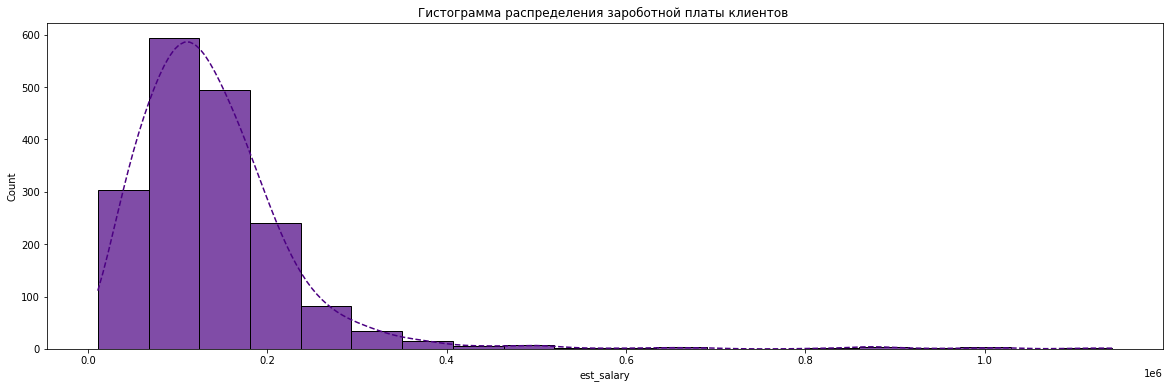

In [67]:
# построим гистограмму распределения по зароботной плате клиентов
plt.figure(figsize=(20, 6))
plt.title('Гистограмма распределения зароботной платы клиентов ')
sns.histplot(df[df['churn']==1]['est_salary'], 
             bins=20, 
             color = 'indigo', 
             alpha = 0.7, kde=True, 
             line_kws = {'color':'indigo','linestyle': 'dashed'})
plt.show()

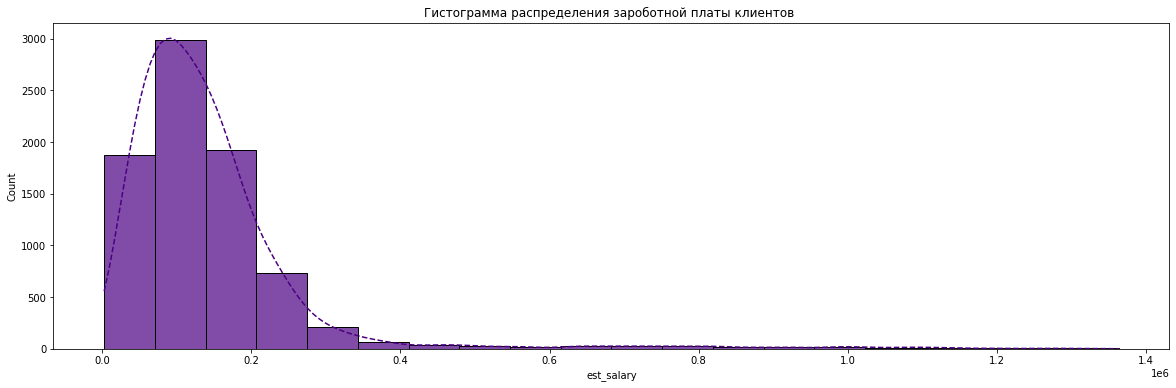

In [68]:
# построим гистограмму распределения по зароботной плате клиентов
plt.figure(figsize=(20, 6))
plt.title('Гистограмма распределения зароботной платы клиентов ')
sns.histplot(df[df['churn']==0]['est_salary'] , 
             bins=20, 
             color = 'indigo', 
             alpha = 0.7, kde=True, 
             line_kws = {'color':'indigo','linestyle': 'dashed'})
plt.show()

In [69]:
est_salary_1 = df[df['churn']==1]['est_salary']
est_salary_0 = df[df['churn']==0]['est_salary'] 

results = st.mannwhitneyu(est_salary_1, est_salary_0)
alpha = 0.05 #задайте значение уровня значимости

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print (results)
print (results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

MannwhitneyuResult(statistic=7579157.0, pvalue=0.0010002387638272613)
0.0010002387638272613
Отвергаем нулевую гипотезу


### Гипотеза №2: различие остатков на счете оставшихся и отточных клиентов
*Сформулируем нулевую и альтернативную гипотезы:*
    
H₀: средний остаток на счете оставшихся и отточных клиентов **равны**

H₁: средний остаток на счете оставшихся и отточных клиентов **не равны**

Критический уровень статистической значимости зададим равный 5%.

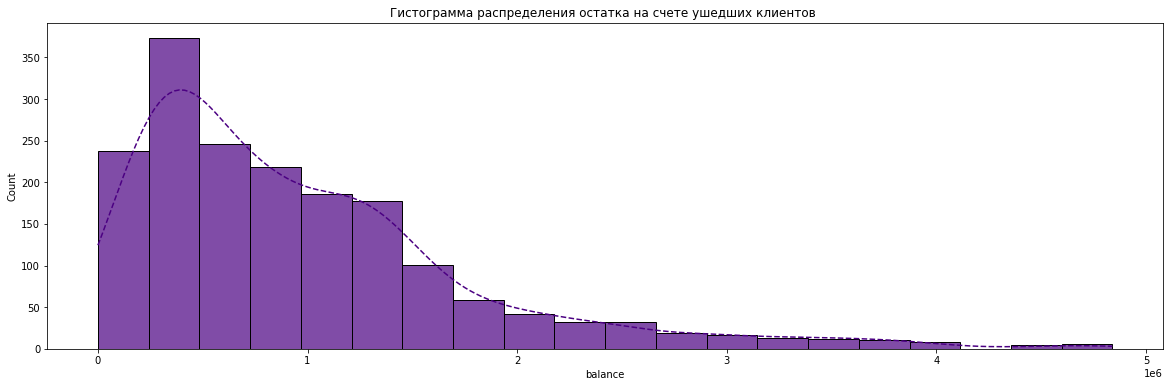

In [70]:
plt.figure(figsize=(20, 6))
plt.title('Гистограмма распределения остатка на счете ушедших клиентов ')
sns.histplot(df[df['churn']==1]['balance'] , 
             bins=20, 
             color = 'indigo', 
             alpha = 0.7, kde=True, 
             line_kws = {'color':'indigo','linestyle': 'dashed'})
plt.show()

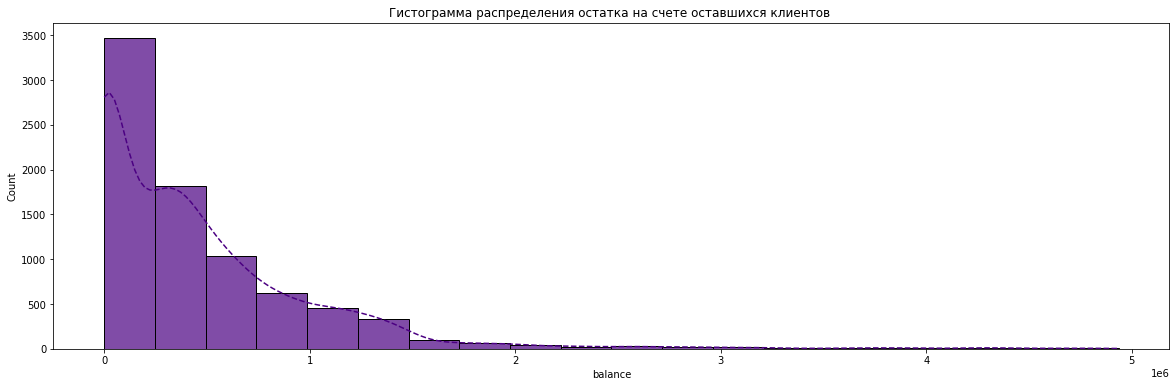

In [71]:
plt.figure(figsize=(20, 6))
plt.title('Гистограмма распределения остатка на счете оставшихся клиентов ')
sns.histplot(df[df['churn']==0]['balance'] , 
             bins=20, 
             color = 'indigo', 
             alpha = 0.7, kde=True, 
             line_kws = {'color':'indigo','linestyle': 'dashed'})
plt.show()

In [72]:
results = st.mannwhitneyu(df[df['churn']==1]['balance'],
                       df[df['churn']==0]['balance'])
alpha = 0.05 #задайте значение уровня значимости

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print (results)
print (results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print ('Не получилось отвергнуть нулевую гипотизу, вывод о различии сделать нельзя')

MannwhitneyuResult(statistic=10609592.0, pvalue=3.305209899651368e-215)
3.305209899651368e-215
Отвергаем нулевую гипотезу: разница статистически значима


*Вывод: Здесь мы также видим в результате проведенного t-test-а, что нулевая гипотеза об остатоке на счете отточных и оставшихся клиентов должна быть отвергнута.*

### Гипотеза №3: различие возрастов оставшихся и отточных клиентов
*Сформулируем нулевую и альтернативную гипотезы:*
    
H₀: средний возраст оставшихся и отточных клиентов **равны**

H₁: средний возраст оставшихся и отточных клиентов **не равны**

Критический уровень статистической значимости зададим равный 5%.

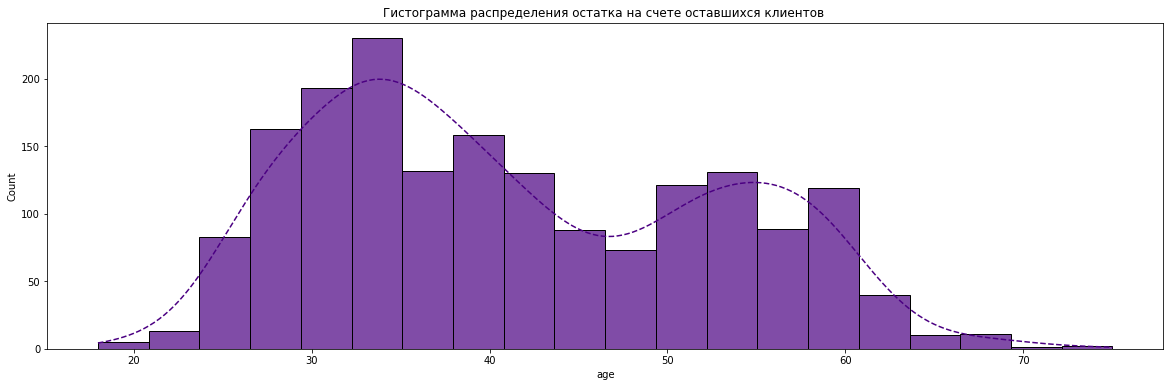

In [73]:
plt.figure(figsize=(20, 6))
plt.title('Гистограмма распределения остатка на счете оставшихся клиентов ')
sns.histplot(df[df['churn']==1]['age'], 
             bins=20, 
             color = 'indigo', 
             alpha = 0.7, kde=True, 
             line_kws = {'color':'indigo','linestyle': 'dashed'})
plt.show()

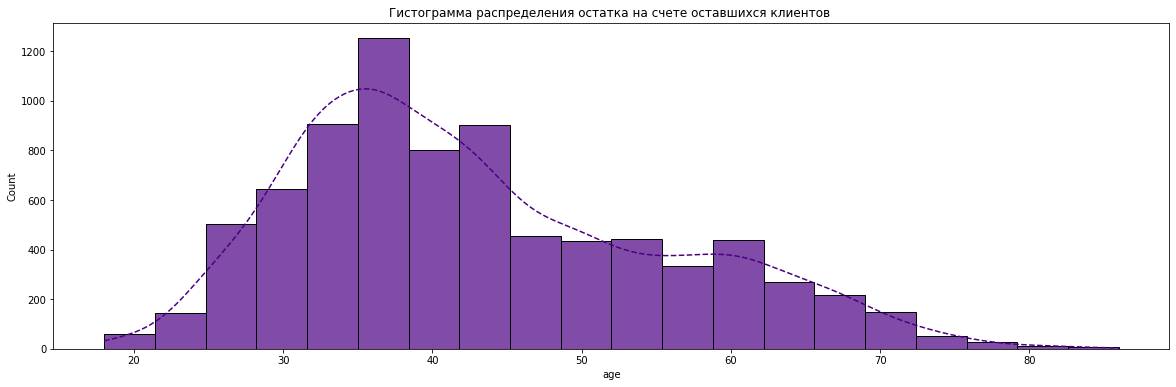

In [74]:
plt.figure(figsize=(20, 6))
plt.title('Гистограмма распределения остатка на счете оставшихся клиентов ')
sns.histplot(df[df['churn']==0]['age'], 
             bins=20, 
             color = 'indigo', 
             alpha = 0.7, kde=True, 
             line_kws = {'color':'indigo','linestyle': 'dashed'})
plt.show()

In [75]:
results = st.mannwhitneyu(df[df['churn']==1]['age'],
                       df[df['churn']==0]['age'])
alpha = 0.05 #задайте значение уровня значимости

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом

print (results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print ('Не получилось отвергнуть нулевую гипотизу, вывод о различии сделать нельзя')

3.0865493946697513e-06
Отвергаем нулевую гипотезу: разница статистически значима


*Вывод: по итогам проведенного эксперемента можем сделать вывод, что гипотиза о равенстве возраста оставшихся клиентов и отточных должна быть отвергнута.*

## Сегментация пользователей

После проведенного анализа выделим несколько сегментов отточных позьзователей.

В качестве основных критерием выберем следубщие характеристики:
- возраст
- пол
- количество используемых продуктов
- количество баллов собственности

In [76]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-46,47-62,63 +,est_salary_group,0-50000,100001-150000,150001-20000,20000-300000,300000+,50001-100000
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,0,1,0,1,0,25-46,0,1,0,0,100001-150000,0,1,0,0,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,47-62,0,0,1,0,150001-20000,0,0,1,0,0,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,25-46,0,1,0,0,50001-100000,0,0,0,0,0,1


### Сегмент 1

- Возраст: 47-62
- Пол: женский
- Оценка собственности: 5 и выше
- Количество используемых продуктов: 3 и больше
- Наличие креддитной карты нет
- Ползовательская активности да

Посчитаем количество пользователей в этой группе.

In [77]:
segment_1 = df.query('age_group=="47-62" and gender=="Ж" and equity>=5and credit_card==0 and last_activity==1').reset_index()

print (f'Количество позьвователей в сегменте равно {segment_1.user_id.count()}')

print (f'Количество отточных клиентов равно {segment_1[segment_1.churn ==1].user_id.count()}')

print (f'Процент отточных клиенто от общего числа клиентов сегмента равно\
 {segment_1[segment_1.churn ==1].user_id.count()/segment_1.user_id.count()*100}')

Количество позьвователей в сегменте равно 82
Количество отточных клиентов равно 40
Процент отточных клиенто от общего числа клиентов сегмента равно 48.78048780487805


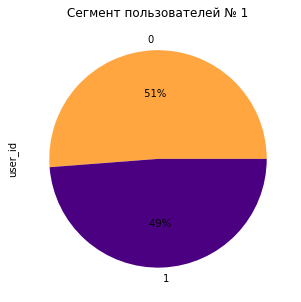

In [78]:
segment_1.groupby('churn')['user_id'].count().plot(kind='pie', y='points', figsize=(6, 5), autopct=' %1.0f%% ',
                                colors = ['#FFA640', 'indigo'],
                                title='Сегмент пользователей № 1')
plt.show()

### Сегмент 2

- Возраст: 47-62
- Пол: мужской
- Оценка собственности: 0 и выше
- Количество используемых продуктов: 2 и больше
- Наличие креддитной карты не важно 
- Пользовательская активности да

Посчитаем количество пользователей в этой группе.

In [79]:
segment_2 = df.query('age_group=="47-62" and gender=="М" and equity>=2 and products>=0 and last_activity==1').reset_index()

print (f'Количество позьвователей в сегменте равно {segment_2.user_id.count()}')

print (f'Количество отточных клиентов равно {segment_2[segment_2.churn ==1].user_id.count()}')

print (f'Процент отточных клиенто от общего числа клиентов сегмента равно\
 {segment_2[segment_2.churn ==1].user_id.count()/segment_2.user_id.count()*100}')

Количество позьвователей в сегменте равно 363
Количество отточных клиентов равно 176
Процент отточных клиенто от общего числа клиентов сегмента равно 48.484848484848484


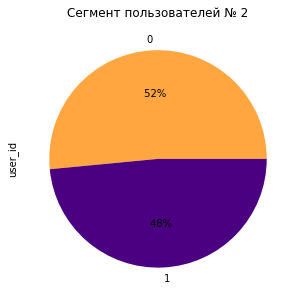

In [80]:
segment_2.groupby('churn')['user_id'].count().plot(kind='pie', y='points', figsize=(6, 5), autopct=' %1.0f%% ',
                                colors = ['#FFA640', 'indigo'],
                                title='Сегмент пользователей № 2')
plt.show()

### Сегмент 3

- Возраст: 25-46
- Пол: любой
- Оценка собственности: 5 и выше
- Количество используемых продуктов: 2 и больше
- Скоринговый рейтинг: не важно
- Наличие креддитной карты не важно 
- Ползовательская активности да

Посчитаем количество пользователей в этой группе.

In [81]:
segment_3 = df.query('age_group=="25-46"  and equity>=5 and products>=2 and last_activity==1').reset_index()

print (f'Количество позьвователей в сегменте равно {segment_3.user_id.count()}')

print (f'Количество отточных клиентов равно {segment_3[segment_3.churn ==1].user_id.count()}')

print (f'Процент отточных клиенто от общего числа клиентов сегмента равно\
 {segment_3[segment_3.churn ==1].user_id.count()/segment_3.user_id.count()*100}')

Количество позьвователей в сегменте равно 636
Количество отточных клиентов равно 312
Процент отточных клиенто от общего числа клиентов сегмента равно 49.056603773584904


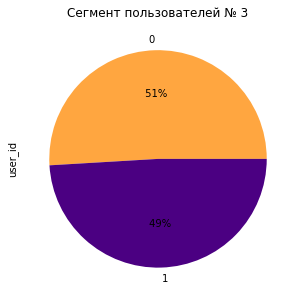

In [82]:
segment_3.groupby('churn')['user_id'].count().plot(kind='pie', y='points', figsize=(6, 5), autopct=' %1.0f%% ',
                                colors = ['#FFA640', 'indigo'],
                                title='Сегмент пользователей № 3')
plt.show()

## Итоговые выводы и рекомендации

### Итоговые выводы

1. В процессе проведенного исследования была обнаружена корреляция между оттоком клиентов и некоторыми параметрами в представленном датасете. В свою очередь некоторые параметры абсолютно не влияют на отток клиентов.

Параметры которые влияют на отток клиентов:

- **количество баллов собственности:** чем выше оценка собственности, тем больше процент отточных клиентов;
- **возраст:**  наиболее отточные возрастные группы - 46-62 и 25-45;
- **пол клиента:**  мужчины чаще уходили из банка чем женщины;
- **количество продуктов которыми пользуется клиент:**  чаще уходят клиенты которые пользуются 4 и более продуктами банка;
- **активность клиента:** более активные клиенты покидают банк чаще чем менее активные;
- **скоринговый рейтинг клиента:** из банка уходили клиенты со скоринговым баллом не ниже 706, а клиенты с более высоким скоринговым рейтингом показывали более высокий процент оттока;

2. Проведен статистичий анализ следующих гипотиз:

   **Гипотиза №1**: о различии доходов оставшихся и ушедших клиентов. Гипотиза подтверждена.
   
   **Гипотиза №2**: о равенстве остатков на счета оставшихся и ушедших клиентов. Гипотиза была опровергнута.
   
   **Гипотиза №3**: о равенстве возраста оставшихся и ушедших клиентов. Гипотиза была опровергнута.
   
   
3. Была произведена сегментация клиентов которые  которые склонны к уходц из банка:

#### Сегмент № 1

- Возраст: 47-62
- Пол: женский
- Оценка собственности: 5 и выше
- Количество используемых продуктов: 3 и больше
- Наличие креддитной карты нет
- Ползовательская активности да

 Процент отточных клиенто от общего числа клиентов сегмента равно 52.77777777777778
 
 **Рекомендации для отдела маркетинга:**
 
- предложить специальные условия по страхованию объектов собственности;
- предложить оформить кредитную карту;
- предложить повышенный кешбек  на избранные товары согласно возрасту и полу.
#### Сегмент № 2

- Возраст: 47-62
- Пол: мужской
- Оценка собственности: 0 и выше
- Количество используемых продуктов: 2 и больше
- Наличие креддитной карты нет
- Пользовательская активности да

 Процент отточных клиенто от общего числа клиентов сегмента равно 64.92537313432835

 **Рекомендации для отдела маркетинга:**
 
- информировать о новых доступных банковских продуктах;
- повышение лояльности пользователей за счёт создания удобных и простых сервисов для пользования банковскими услугами;
- предложить оформить кредитную карту;
- для клиентов пенсионного возраста - предложить льготные условия для перевода пенсии в наш банк;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить повышенный кешбек на избранные товары согласно возрасту и полу

#### Сегмент № 3

- Возраст: 25-46
- Пол: любой
- Оценка собственности: 5 и выше
- Количество используемых продуктов: 2 и больше
- Скоринговый рейтинг: 750 и выше
- Наличие креддитной карты нет
- Ползовательская активности да

 Процент отточных клиенто от общего числа клиентов сегмента равно 60.0

 **Рекомендации для отдела маркетинга:**
 
- информировать о новых доступных банковских продуктах;
- повышение лояльности пользователей за счёт создания удобных и простых сервисов для пользования банковскими услугами;
- предложить оформить кредитную карту;
- для клиентов пенсионного возраста - предложить льготные условия для перевода пенсии в наш банк;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить повышенный кешбек на избранные товары согласно возрасту и полу;